<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/pj3_heart_attack/pj3_heart_attact_prediction_team5_hj_0420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')
     

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
# XGBClassifier를 임포트
from xgboost import XGBClassifier

# accuracy_score를 임포트합
from sklearn.metrics import accuracy_score

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

- xgboost: Asymmetric tree구조로 기준을 정해서 depth가 내려감
- catboost: Oblivious tree구조로 분류하는데 효과적, 특히 범주형 변수를 처리하는데 효과적 (gradient boost에서 target leakage, prediction shift로 인한 overfitting에 대한 해결방법으로 ordering boosting(random boosting해서 permutation; 하나의 무작위 순열이 아닌 몇 개의 무작위 순열을 사용하여 TS추정)이 있음/ 데이터 대부분이 수치형인 경우 큰 효과가 없으며, lightbgm보다 학습 속도가 느림

In [8]:
#warnings 끄기, 경고를 표시X
import warnings
warnings.filterwarnings('ignore')

"""
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)"""

"\n# row 생략 없이 출력\npd.set_option('display.max_rows', None)\n# col 생략 없이 출력\npd.set_option('display.max_columns', None)"

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)
운동 유발성 협심증 1,0 

ca: number of major vessels (0-3)

##################################################
cp : Chest Pain type chest pain type(가슴통증), 

Chest pain type ~ 
0 = Typical Angina(전형적 협심증),
1 = Atypical Angina(비전형적인 협심증), 
2 = Non-anginal Pain(협심증이 아닌 통증), 
3 = Asymptomatic(무증상)

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
####################################################


trtbps : resting blood pressure (in mm Hg) 안정적 혈압

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
공복혈당 > 120mg/dl이상 1, 이하 0 

###########################################################################
rest_ecg : resting electrocardiographic results
심전도 결과

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#########################################################################

thalach : maximum heart rate achieved
최대 심작 박동수

target : 
0= less chance of heart attack 
1= more chance of heart attack



In [9]:
df=pd.read_csv('/content/drive/MyDrive/data/heart_attack/heart.csv')

In [10]:
df.head

<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.info()
#exng: exercise induced angina
#oldpeak: previous peak 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
! pip install -U pandas-profiling

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [22]:
import pandas_profiling
profile_heart = df.profile_report()
profile_heart

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

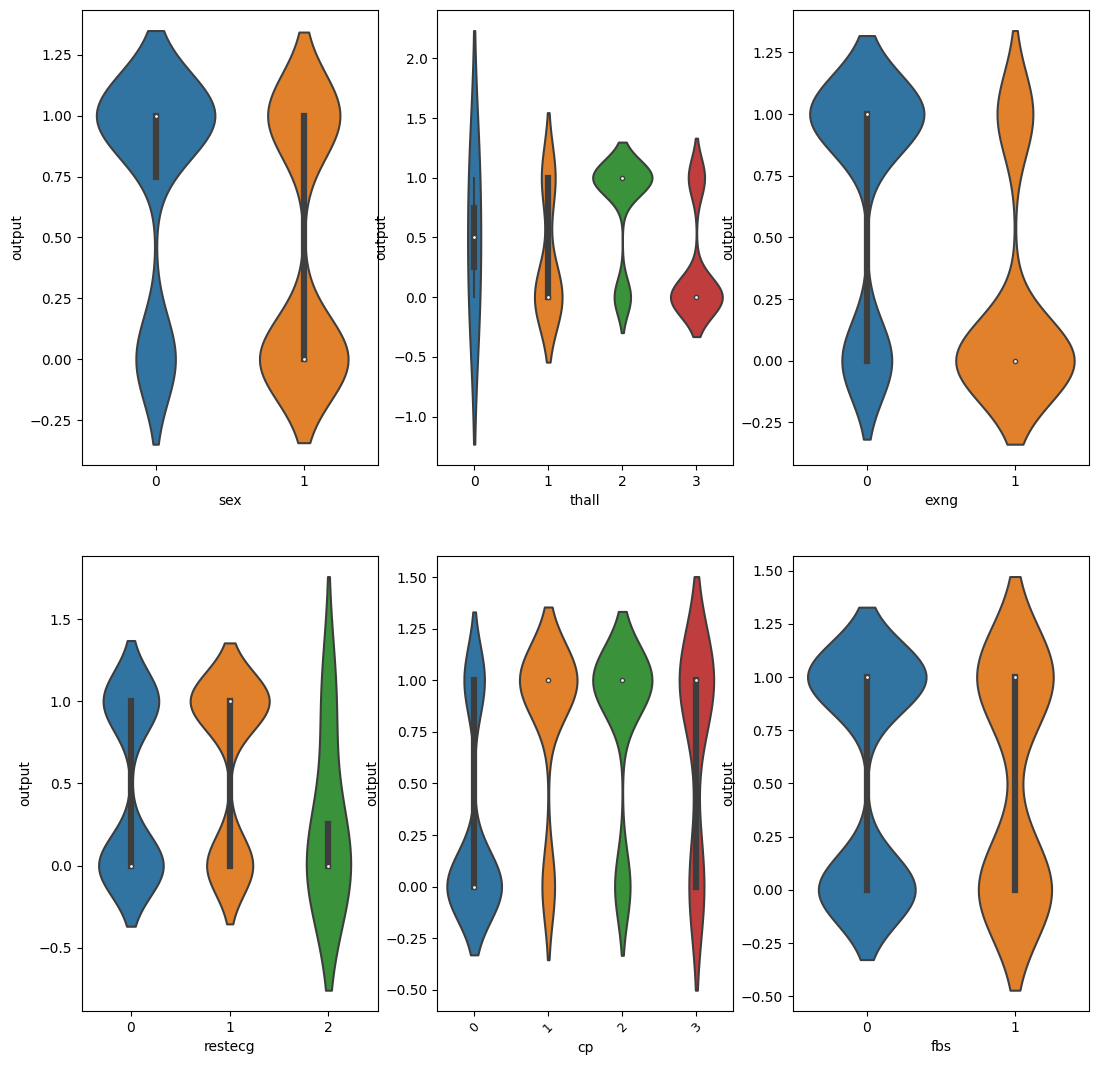

In [ ]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = df)

plt.show()

In [ ]:
#@title
#https://colorhunt.co/palette/fdf4f5e8a0bfba90c6c0dbea
color_palette = ["#FDF4F5","#E8A0BF","#BA90C6","#C0DBEA","#FDF7C3"]

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])


Text(0, 0.5, '')

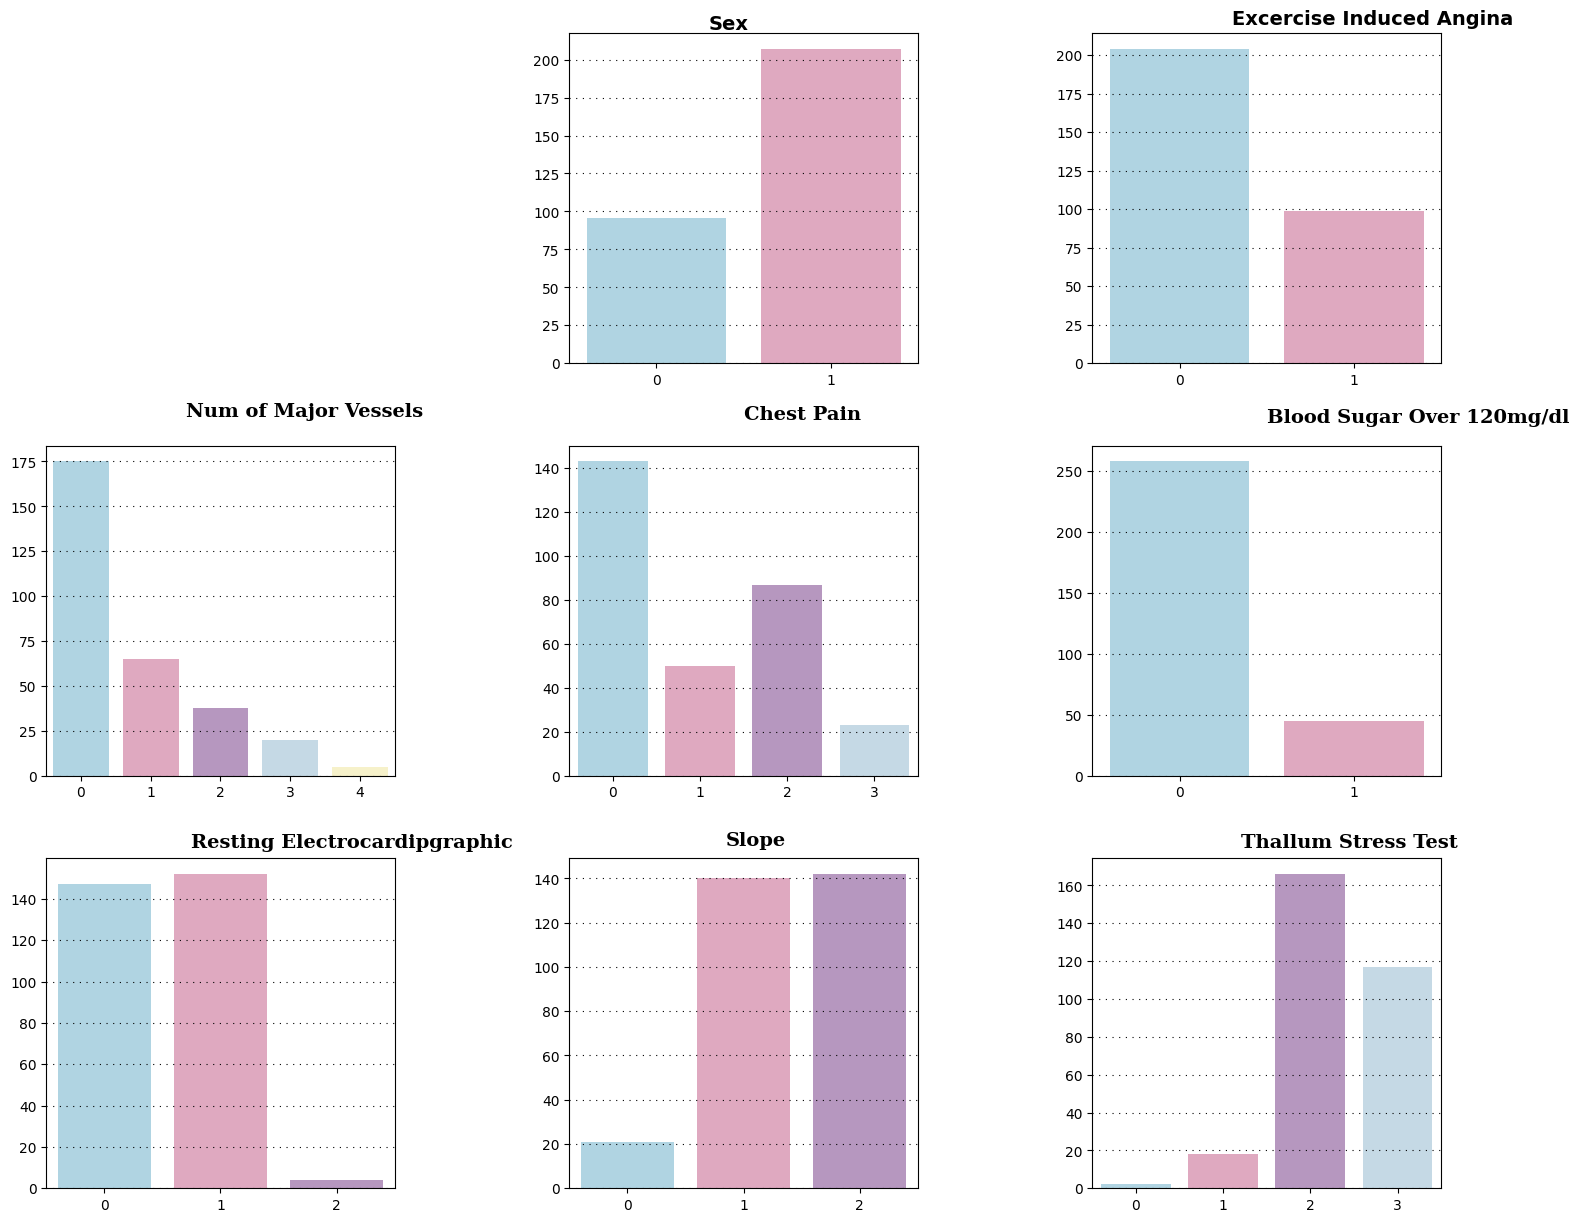

In [13]:
#https://colorhunt.co/palette/fdf4f5e8a0bfba90c6c0dbea
color_palette = ["#A8D8EA","#E8A0BF","#BA90C6","#C0DBEA","#FDF7C3"]
#A8D8EA 하늘
#AA96DA 찐연보라
#FDF4F5 연분홍
#AA96DA

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
#ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])



# Sex
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='Georgia', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Excercise Induced Angina(exng)
ax2.text(0.3, 220, 'Excercise Induced Angina', fontsize=14, fontweight='bold', fontfamily='Georgia', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Num of Major Vessels(caa)
ax3.text(1.5, 200, 'Num of Major Vessels', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chest Pain(cp)
ax4.text(1.5, 162, 'Chest Pain', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Blood Sugar Over 120mg/dl :1 (fbs)
ax5.text(0.5, 290, 'Blood Sugar Over 120mg/dl', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Resting Electrocardipgraphic Results(restecg)
ax6.text(0.75, 165, 'Resting Electrocardipgraphic', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slope(slp)
ax7.text(0.85, 155, 'Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thallum Stress Test(thall) 
ax8.text(1.2, 180, 'Thallum Stress Test', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

In [ ]:
#@title

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
"""ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")"""


'ax0.text(0.5,0.5,\n         \'Count plot for various\n categorical features\n_________________\',\n         horizontalalignment=\'center\',\n         verticalalignment=\'center\',\n         fontsize=18, fontweight=\'bold\',\n         fontfamily=\'serif\',\n         color="#000000")'

In [14]:
#복제
df1 = df

#컬럼 나누기 
categorical_col = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
numerical_col = ["age","trtbps","chol","thalachh","oldpeak"]

In [15]:
#categorical col에 대해 one-hot-encoding
df1 = pd.get_dummies(df1, columns = categorical_col, drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,exng_1,caa_1,caa_2,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


In [ ]:
#feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
y

0      0
1      0
2      0
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: thall_3, Length: 303, dtype: uint8

In [ ]:
print(y.unique())

[0 1]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# StratifiedKFold
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
#feature importance 
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

In [ ]:
print('전체 데이터의 클래스 분포:', np.bincount(y))
print()

for split_no, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print('{}번째 훈련 폴드:'.format(split_no+1), np.bincount(y[train_idx]))
    print('{}번째 검증 폴드:'.format(split_no+1), np.bincount(y[test_idx]))

    print()

전체 데이터의 클래스 분포: [186 117]

1번째 훈련 폴드: [148  94]
1번째 검증 폴드: [38 23]

2번째 훈련 폴드: [149  93]
2번째 검증 폴드: [37 24]

3번째 훈련 폴드: [149  93]
3번째 검증 폴드: [37 24]

4번째 훈련 폴드: [149  94]
4번째 검증 폴드: [37 23]

5번째 훈련 폴드: [149  94]
5번째 검증 폴드: [37 23]



In [ ]:
#성비 불균형 데이터 해결 SMOTE, ADASYN 시도해 보기 

#https://koreascience.kr/article/CFKO201629368414811.pdf
"""성별이 입력된 사용자의 정보를 바탕으로,
성별이 입력되지 않은 사용자의 성별을 예측하는 기법을
연구했다. 여러 분류 알고리즘들 중 비교적 분류 성능은
떨어지지만 확률을 기반으로 하여 성별 예측의 정확률 추
론이 가능한 나이브 베이지안을 응용"""

#성능평가 다른 모델 SVM, XGBoost
#GridSearch, RandomizedSearchCV
#bagging, votting 
#ensemble

In [ ]:
model = XGBClassifier(booster='gbtree', objective='binary:logistic')


In [ ]:
# 교차 검증 점수를 계산합니다.
scores = cross_val_score(model, X, y, cv=kfold)

# 정확도를 출력합니다.
print('정확도:', np.round(scores, 2))

# 정확도 평균을 출력합니다.
print('정확도 평균: %0.2f' % (scores.mean()))

정확도: [1.   1.   0.97 1.   1.  ]
정확도 평균: 0.99


In [ ]:
#RF
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

#교차 검증
scores = cross_val_score(rf,X,y,cv=5)

#정확도 측정
print('정확도 : ',np.round(scores,3))

#정확도 측정
print('정확도의 평균: %0.3f ' %(scores.mean()))

정확도 :  [0.738 0.984 1.    0.967 0.883]
정확도의 평균: 0.914 


In [1]:
#이상치 처리
from collections import Counter

In [3]:
#from collections import Counter
#https://hong-yp-ml-records.tistory.com/15

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
        
Outliers_to_drop = detect_outliers(df, 2, ["categorical_col"])

NameError: ignored